In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: 9C30-9931

 Directorio de C:\Users\erik_\Curso-IA-Udemy\Regresión Logisitica

19/07/2021  22:38    <DIR>          .
19/07/2021  22:38    <DIR>          ..
19/07/2021  22:34    <DIR>          .ipynb_checkpoints
19/07/2021  22:38             1.976 Ejemplo con titanic.ipynb
18/07/2021  00:11            70.438 presicion.png
18/07/2021  00:07            50.879 RL1.png
18/07/2021  00:10            74.546 RL2.png
18/07/2021  00:11            61.194 train.csv
18/07/2021  00:05               767 untitled.txt
               6 archivos        259.800 bytes
               3 dirs  69.150.212.096 bytes libres


In [7]:
entrenamiento = pd.read_csv("train.csv")

In [9]:
entrenamiento.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:>

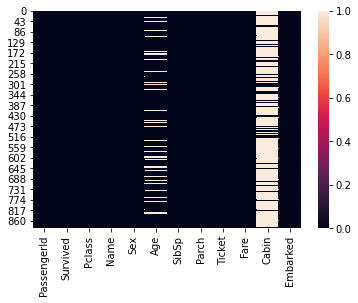

In [12]:
#para saber que columna tiene más valores nulos de forma grafica
sns.heatmap(entrenamiento.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

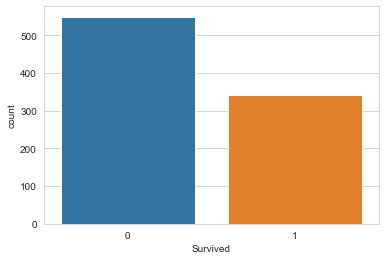

In [14]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=entrenamiento)

<AxesSubplot:xlabel='Survived', ylabel='count'>

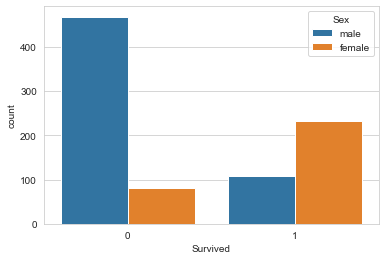

In [23]:

sns.countplot(x="Survived",data=entrenamiento, hue="Sex")

In [19]:
entrenamiento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

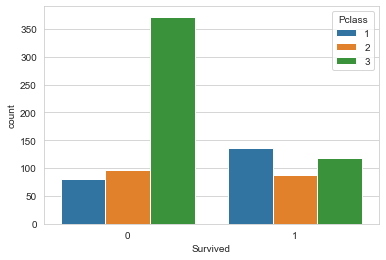

In [22]:

sns.countplot(x="Survived",data=entrenamiento, hue="Pclass")

H:\programasparapython\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

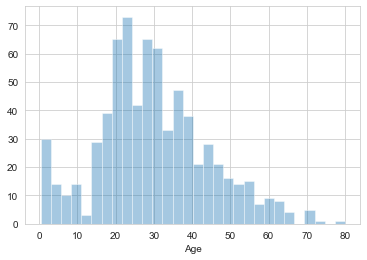

In [21]:
sns.distplot(entrenamiento["Age"].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

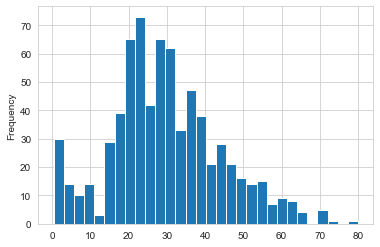

In [25]:
entrenamiento["Age"].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

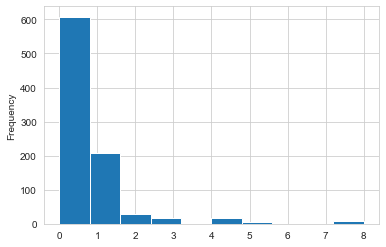

In [29]:
#numero de familiares a bordo
entrenamiento["SibSp"].plot.hist(bins=10)

In [30]:
import cufflinks as cf

In [32]:
cf.go_offline()

In [34]:
#ver tarifa utilizando Iplot(metodo de cufflinks) para hacerlo interactivo.
entrenamiento["Fare"].iplot(kind="hist",bins=40)

<AxesSubplot:>

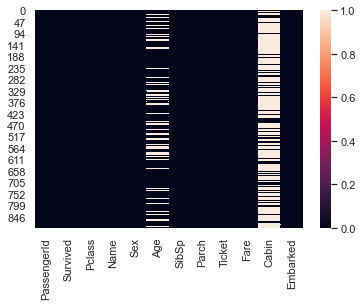

In [42]:

sns.set_theme() #resetear el estilo
sns.heatmap(entrenamiento.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

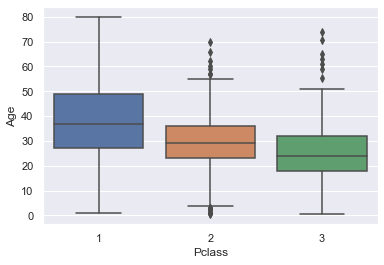

In [43]:
#calcular la edad media para ponerlo en el nulo

sns.boxplot(x="Pclass",y="Age",data=entrenamiento)


In [44]:
#la edad media para la clae 1 es de 38 masomenos y los demas lo mismo


In [45]:
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        if clase == 2:
            return 30
        if clase == 3:
            return 25
    else:
        return edad

In [46]:
entrenamiento["Age"] = entrenamiento[["Age","Pclass"]].apply(edad_media,axis=1)

<AxesSubplot:>

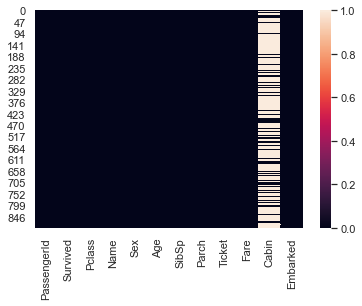

In [49]:
sns.set_theme() #resetear el estilo
sns.heatmap(entrenamiento.isnull())
# ya no tienen valores nulos (en edad)

In [50]:
# Cabin casi no tiene valores, asi que la eliminamos
entrenamiento.drop("Cabin",axis=1,inplace=True)